# Computer Vision Assignment 5
### Naveen (nlp49), Yanbo (yl2556)

## Task 1 Optical Character Recognition using Template Matching
### 1.1 Find Font
We used the Templete Matching method in OpenCV for each font templete. Since we are using SSD method, the result of templete matching ranges from 7834.0 to 8.13421e+06. So we set the threshold to 1,000,000.0 and had PlatinoLinotype, TimesNewRoman, and Verdana three font matches. Then we lower to 100,000.0 and we have only one match among all the templetes. As the result shown below, the font in the text is PlatinoLinotype.

In [89]:
img_ori = cv2.imread('Text.jpg',0)
template = cv2.imread('PlatinoLinotype.jpg',0)
img = img_ori.copy()
res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
print res.max(),res.min()
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print min_loc

8.13421e+06 7834.0
(149, 391)


In [70]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

img = cv2.imread('Text.jpg',0)

def findfont(img_ori,template,threshold):
    img = img_ori.copy()
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
    #min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    #threshold = 100000.0
    loc = np.where( res <= threshold)
    print ('%d match was found.'%len(loc[0]))
    if(len(loc[0])):
        for pt in zip(*loc[::-1]):
            cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        #cv2.imshow('Fond Match',img)
        plt.figure(figsize=(15,15))
        plt.imshow(img,cmap = cm.Greys_r)
        plt.axis('off')
        plt.show()

For font Ariel:
0 match was found.
For font Calibari:
0 match was found.
For font PlatinoLinotype:
1 match was found.


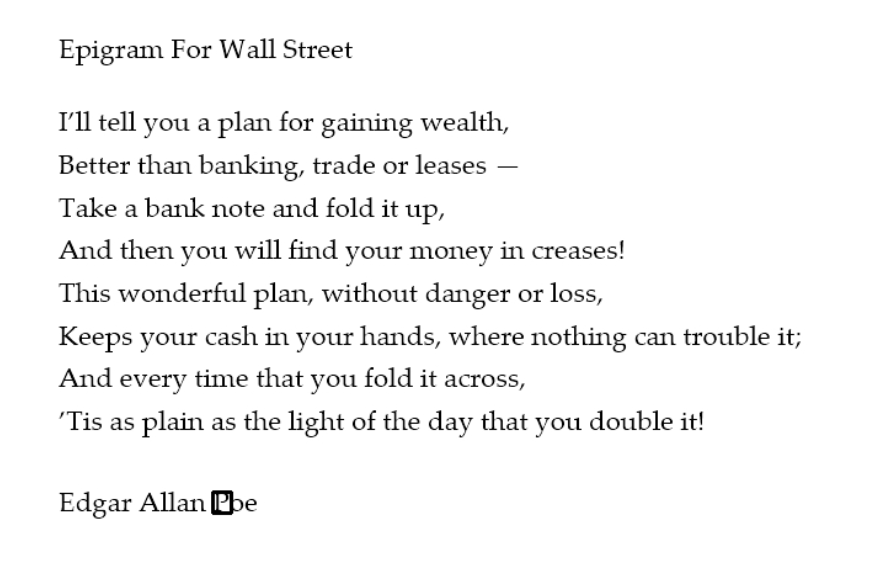

For font TimesNewRoman:
0 match was found.
For font Verdana:
0 match was found.


In [71]:
font = ['Ariel','Calibari','PlatinoLinotype','TimesNewRoman','Verdana']
for font_temp in font:
    temp = cv2.imread(str(font_temp)+'.jpg',0)
    print('For font %s:'%font_temp)
    findfont(img,temp,100000.0)

### 1.2 Find Size
We used the same method as above, because we found that different font size templetes are actually different in shape, not just the difference of scale or image size. As the result shown below, the size of font in the text is 14.

For size 10:
0 match was found.
For size 11:
0 match was found.
For size 12:
0 match was found.
For size 14:
2 match was found.


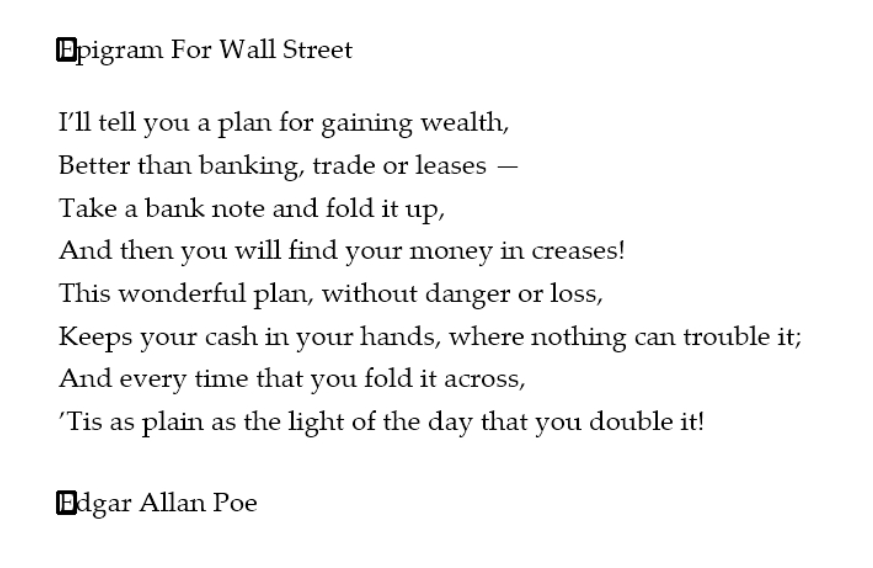

For size 16:
0 match was found.


In [72]:
size = [10,11,12,14,16]
for size_temp in size:
    temp = cv2.imread(str(size_temp)+'.jpg',0)
    print('For size %d:'%size_temp)
    findfont(img,temp,100000.0)

### 1.3 Find letter 'a' and 't'

First, we cut the template directly from the orignal text (and the pixel size is the same as original as well). The way to find the best threshold is: first, find the range of threshold, where the maximum is having zero false positive, and the minimum is having zero true negtive; then use bisect algorithm untill both FP and TN are zero. In our case, we raised the threshold from 100,000.0 to 500,000.0 and found that all the letter was correctly located with zero missing.

For a:


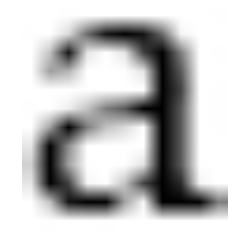

33 match was found.


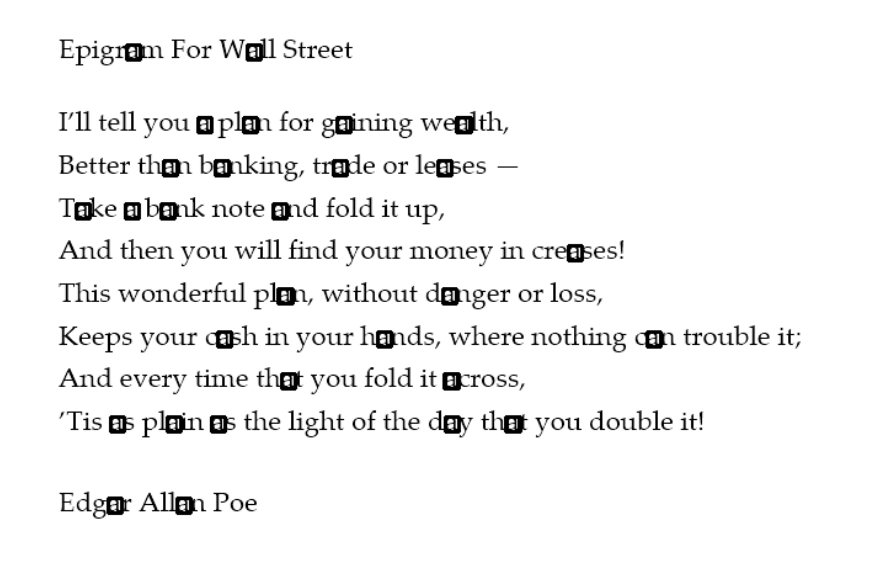

For a_cap:


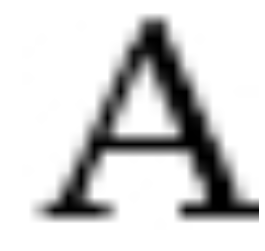

3 match was found.


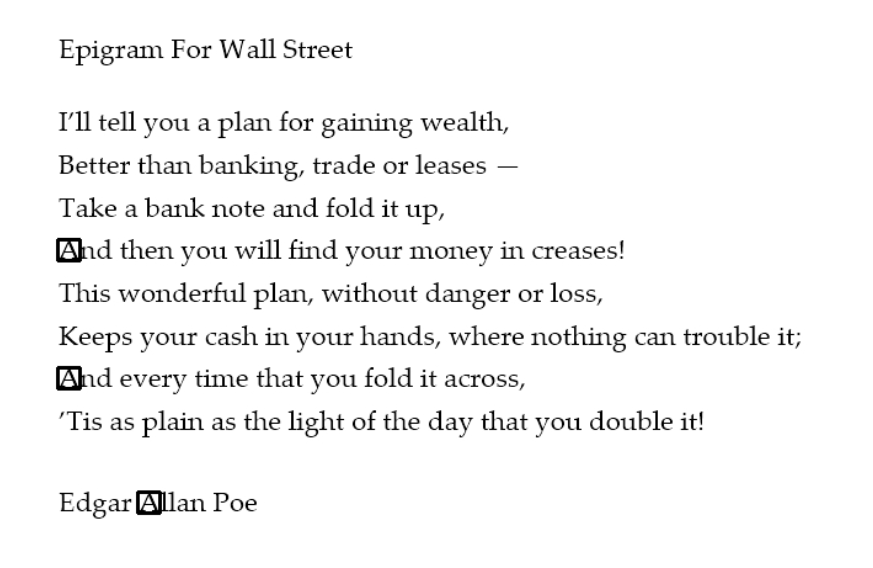

For t:


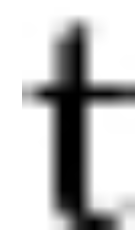

37 match was found.


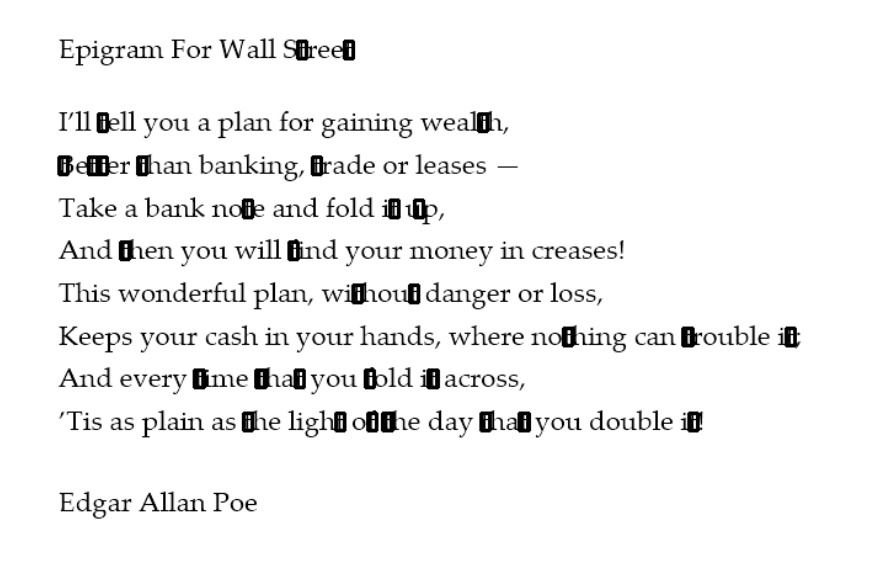

For t_cap:


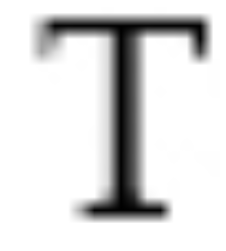

3 match was found.


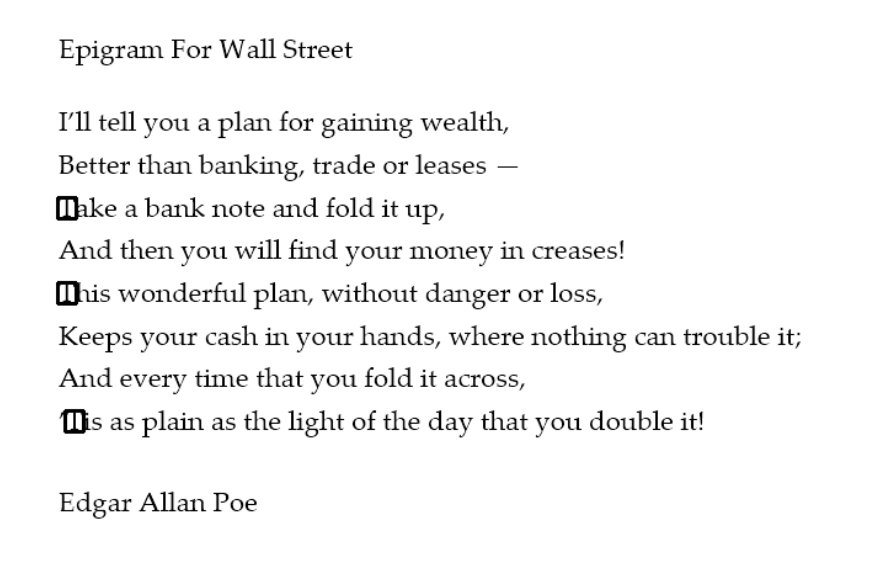

In [88]:
img = cv2.imread('Text.jpg',0)
a_t = ['a','a_cap','t','t_cap']
for a_t_temp in a_t:
    temp = cv2.imread(a_t_temp+'.jpg',0)
    print('For %s:'%a_t_temp)
    plt.imshow(temp,cmap = cm.Greys_r)
    plt.axis('off')
    plt.show()
    findfont(img,temp,500000.0)

### 1.4 Automatic OCR

In order to make the previous process automatic, there should be several letter (both capital and small) font and size in the training set with a exact correct answer for the size, font, and number of matches, so that the perfect threshold for each subject can be set based on the training set. And then it is optional to have a validation set to test the system. Finally, use the threshold to go over each letters for each subject that need to be recognized (font, size, number of matches), and return the direct result, or have a voting system for the subjects (like size or font in this the given image) that have only one correct answer.

### 1.5 Replacing 'c' with 'k'
In order to replace 'c', we first used the same method above to find the appropriate threshold. We used bisect to found that 27500.0 was the exact threshold with 0 TN and 0 FP. The result shown that there are 4 matches.
Then we found that the template for 'c' and 'k' are of the same size, so simply replace the pixel value in the text where the 'c' located to 'k' would do just fine.

4 match was found.


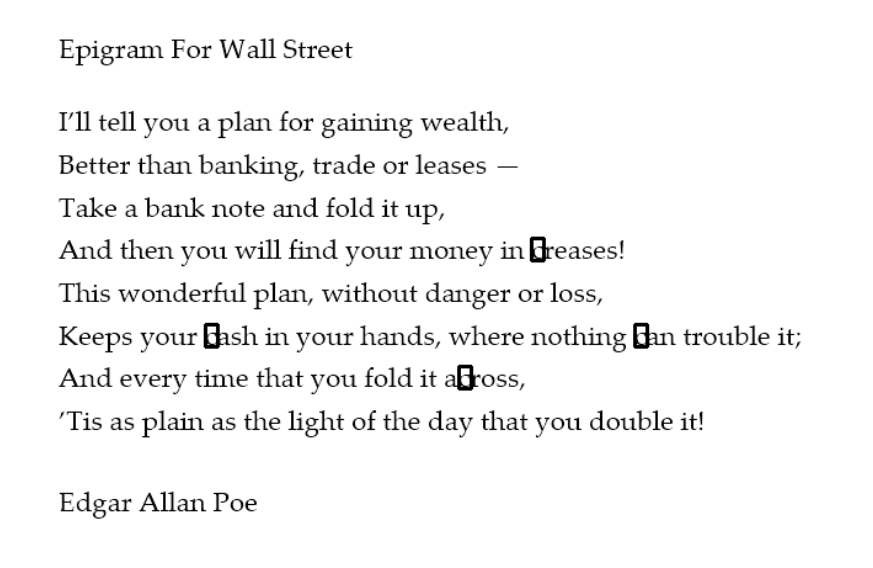

In [98]:
img = cv2.imread('Text.jpg',0)
temp_c = cv2.imread('c.jpg',0)
temp_k = cv2.imread('k.jpg',0)
findfont(img,temp_c,275000.0)

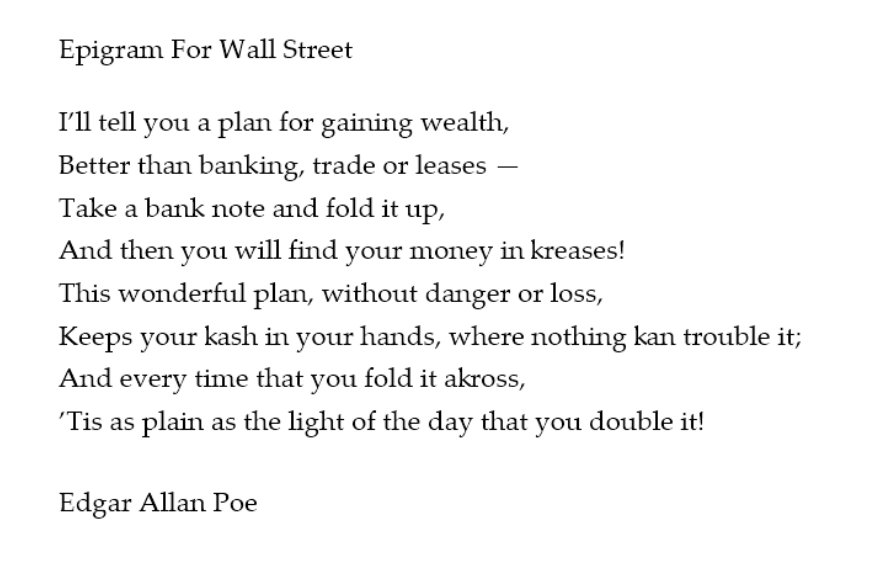

In [126]:
img = cv2.imread('Text.jpg',0)
w, h = temp_c.shape[::-1]
res = cv2.matchTemplate(img,temp_c,cv2.TM_SQDIFF)
threshold = 275000.0
loc = np.where( res <= threshold)
img_k = img.copy()
for pt in zip(*loc[::-1]):
    img_k[pt[1]:(pt[1] + h), pt[0]:(pt[0] + w)] = temp_k
plt.figure(figsize=(15,15))
plt.imshow(img_k,cmap = cm.Greys_r)
plt.axis('off')
plt.show()